# Autoencoder
![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

This tutorial is based on the <a href="https://blog.keras.io/building-autoencoders-in-keras.html">official Autoencoder tutorial</a> on the Keras blog created by <a href="https://twitter.com/fchollet">Francois Chollet</a>. 

## What is an Autoencoder?

An autoencoder is a type of artificial neural network which has the goal of learning the identity function. In other words it tries to copy its input to its output.

### But why would we need this?

If the only purpose of an autoencoder would be to try and copy the input it would be useless. But by placing constraints on the network we can discover interesting structures in the data.

### What can you use it for?

We can use an autoencoder for <b>data denoising</b>, <b>dimensionality reduction</b> as well as generating new data that is simular to the data we trained it on.

## Autoencoder in Keras

Autoencoders can be build with multiple different neural network architectures like simple FFNN as well as CNN and RNN and Keras let's use implement all of them.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM 
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


### Loading in dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
del y_train
del y_test

# scale data between 0 and 1
x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

# Reshape data
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


### Simple autoencoder

Let's start simple by creating an really simple autoencoder which tries to learn the identity function of the MNIST dataset.

In [3]:
input_layer = Input(shape=(784,))
# encoded layer. compresses data by the factor 12.25 (784/64=12.25)
encoded = Dense(64, activation='relu')(input_layer)
# decoded layer. reconstructs the input (units are equal to the input dimension of the image)
decoded = Dense(784, activation='sigmoid')(encoded)

Creating models:

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoded)

In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_layer, encoded)

In [6]:
# for the decoder we need to create an input layer which has the dimensionality of the encoded layer
input_layer_dec = Input(shape=(64,))
# retrieve the last layer of the autoencoder model and place it after the input layer
decoder_layer = autoencoder.layers[-1](input_layer_dec)

decoder = Model(input_layer_dec, decoder_layer)

Configure and fit our autoencoder model:

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=50,
                batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.3497 - val_loss: 0.2671
Epoch 2/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2567 - val_loss: 0.2425
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2310 - val_loss: 0.2176
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2098 - val_loss: 0.2001
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1955 - val_loss: 0.1883
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1852 - val_loss: 0.1794
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1772 - val_loss: 0.1723
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1705 - val_loss: 0.1661
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1647 - val_loss: 0.1607
Epoch

In [8]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images) # takes the output from the encoder as input

Visualize results using matplotlib:

In [9]:
def visualize_data(data, size):
    n = 10 # number of digits that will be displayed
    plt.figure(figsize=(20, 4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(data[i].reshape(size, size)) # reshape the image back to its normal shape
        # disable axis
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()    

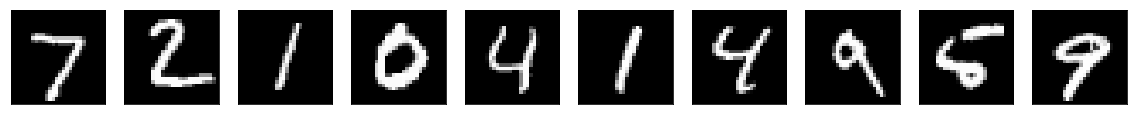

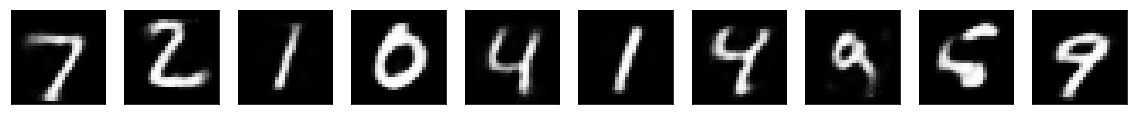

In [10]:
visualize_data(x_test, 28)
visualize_data(decoded_images, 28)

We can also display our encoded images so we can see what shapes the algorithm thinks are important.

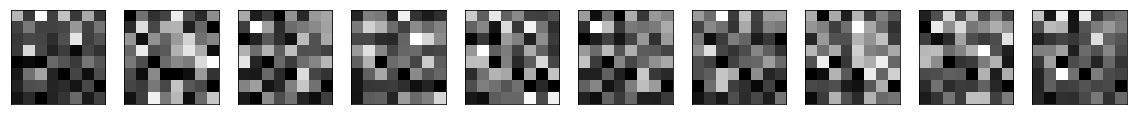

In [11]:
visualize_data(encoded_images, 8)

### Deep autoencoder

To get better results we can use more layers or we could add sparsity using the <i>activity_regularizer</i> parameter.

In [12]:
input_layer = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [13]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.3216 - val_loss: 0.2600
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.2432 - val_loss: 0.2245
Epoch 3/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.2125 - val_loss: 0.1999
Epoch 4/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1921 - val_loss: 0.1834
Epoch 5/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1786 - val_loss: 0.1712
Epoch 6/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1686 - val_loss: 0.1631
Epoch 7/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1601 - val_loss: 0.1551
Epoch 8/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.1534 - val_loss: 0.1498
Epoch 9/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1472 - val_loss: 0.1

In [14]:
autoencoded_images = autoencoder.predict(x_test)

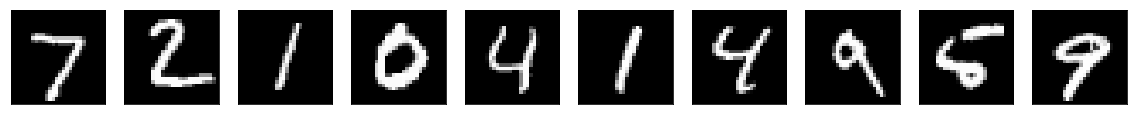

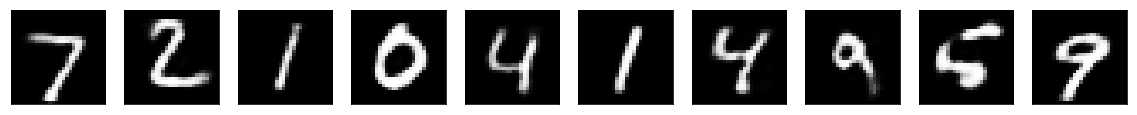

In [15]:
visualize_data(x_test, 28)
visualize_data(autoencoded_images, 28)

### Convolutional autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (CNNs) since they have shown to achieve state of the art performance on image data.

We will use MaxPolling to down-sample our data in the encoder and we will use UpSampling for the decoder.

In [16]:
# Reshape data for Convolutional Layer
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [17]:
input_layer = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# encoded representation is (4, 4, 8) i.e. 128-dimensional 

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [18]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

In [19]:
autoencoder.fit(x_train, x_train, epochs=50, 
                batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 42s 704us/step - loss: 0.2116 - val_loss: 0.1619
Epoch 2/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1518 - val_loss: 0.1408
Epoch 3/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1378 - val_loss: 0.1312
Epoch 4/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1305 - val_loss: 0.1335
Epoch 5/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1259 - val_loss: 0.1210
Epoch 6/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1225 - val_loss: 0.1192
Epoch 7/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1197 - val_loss: 0.1167
Epoch 8/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1179 - val_loss: 0.1189
Epoch 9/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.1165 - val_

In [20]:
autoencoded_images = autoencoder.predict(x_test)

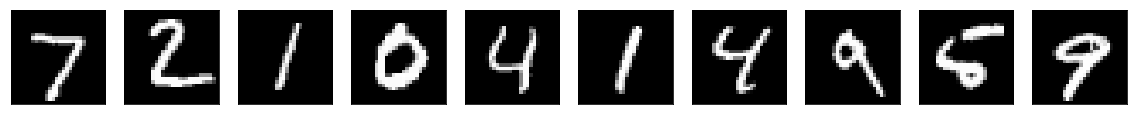

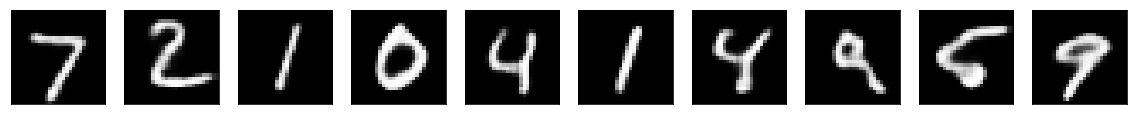

In [21]:
visualize_data(x_test, 28)
visualize_data(autoencoded_images, 28)

### Image denoising

We can denoise our image by letting our autoencoder map noisy images to clean once.

##### Creating noisy data

In [22]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

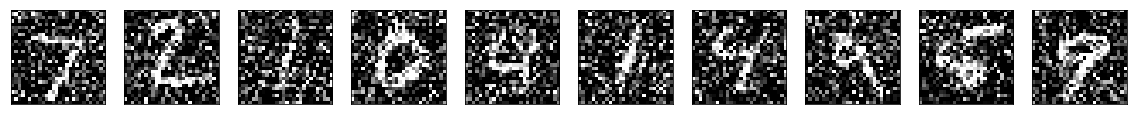

In [23]:
visualize_data(x_test_noisy, 28)

In order to improve the quality of the image we will need more filters for our Convolutional Layers.

In [24]:
input_layer = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [25]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, 
                batch_size=128, shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 247us/step - loss: 0.1810 - val_loss: 0.1302
Epoch 2/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.1219 - val_loss: 0.1156
Epoch 3/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.1139 - val_loss: 0.1107
Epoch 4/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.1098 - val_loss: 0.1076
Epoch 5/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.1072 - val_loss: 0.1061
Epoch 6/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.1057 - val_loss: 0.1066
Epoch 7/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.1045 - val_loss: 0.1039
Epoch 8/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.1037 - val_loss: 0.1016
Epoch 9/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.10

Epoch 76/100
60000/60000 [==============================] - 13s 221us/step - loss: 0.0957 - val_loss: 0.0953
Epoch 77/100
60000/60000 [==============================] - 13s 218us/step - loss: 0.0956 - val_loss: 0.0954
Epoch 78/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.0956 - val_loss: 0.0962
Epoch 79/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.0957 - val_loss: 0.0956
Epoch 80/100
60000/60000 [==============================] - 13s 218us/step - loss: 0.0956 - val_loss: 0.0953
Epoch 81/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.0955 - val_loss: 0.0953
Epoch 82/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.0956 - val_loss: 0.0956
Epoch 83/100
60000/60000 [==============================] - 13s 218us/step - loss: 0.0955 - val_loss: 0.0951
Epoch 84/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.0955 - val_loss: 0.0956
Epoch 85/100
60000/

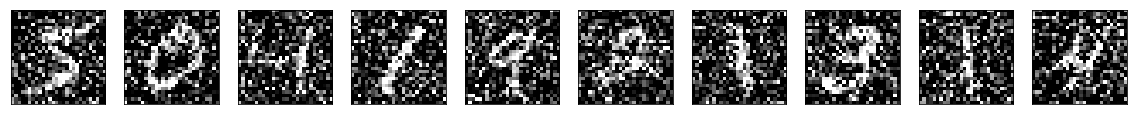

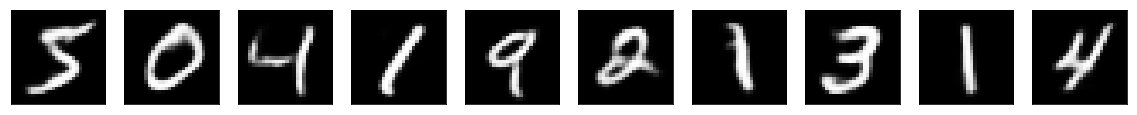

In [27]:
denoised_data = autoencoder.predict(x_train_noisy)

visualize_data(x_train_noisy, 28)
visualize_data(denoised_data, 28)

## Resources 

<ul>
    <li><a href="https://blog.keras.io/building-autoencoders-in-keras.html">Building Autoencoders in Keras (Keras Blog)</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Autoencoder">Autoencoder (Wikipedia)</a></li>
    <li><a href="http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/">Autoencoders (Stanford University)</a></li>
</ul>